In [9]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

In [11]:
# Load the California housing dataset
california=fetch_california_housing(as_frame=True)
df=california.frame
df.head(5)



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
# Check for null values
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
#seperate features vs target
X=df.drop('MedHouseVal', axis=1)

y=df['MedHouseVal']
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for convenience
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818


Why Standardization?
Standardization (mean=0, std=1) is chosen over normalization because:

The features have different units and ranges (e.g., population vs. house age).

It helps algorithms like Linear Regression, KNN, or Gradient Descent-based models perform better by ensuring all features contribute equally.

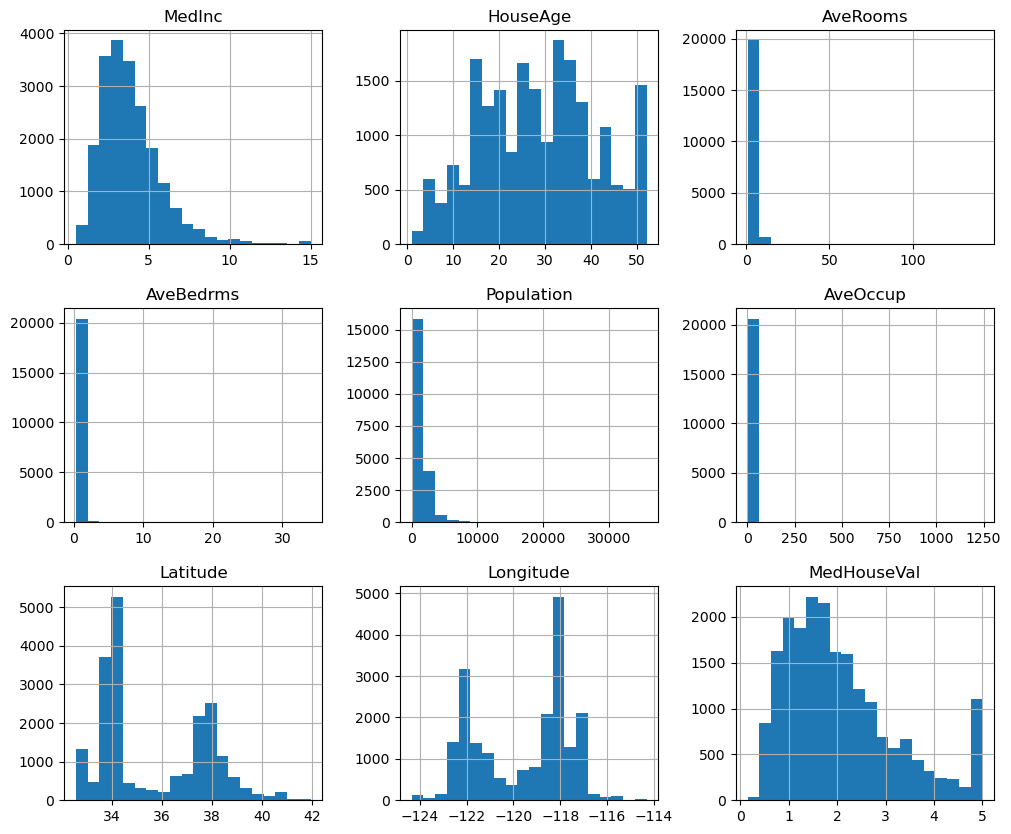

In [23]:
# Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

#plotting histogram

df.hist(figsize=(12,10),bins=20)
plt.show()

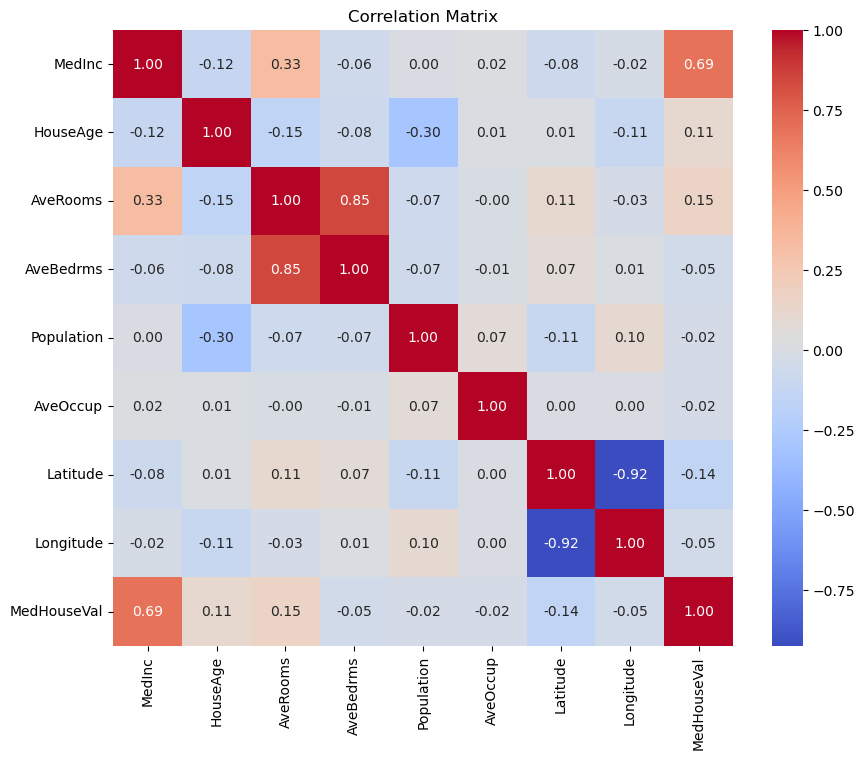

In [25]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Key Observations from EDA:
MedInc (Median Income) has the strongest positive correlation (0.69) with the target (MedHouseVal).

AveRooms and AveOccup have low correlation with the target and may need transformation or further analysis.

Population has low correlation, but it might still carry non-linear insights for tree-based models.

 Documentation Summary
Loading: Used fetch_california_housing to load the dataset into a pandas DataFrame.

Missing Values: Checked and found no missing values, so no imputation was done.

Feature Scaling: Applied StandardScaler to ensure uniform contribution of features with different scales.

EDA: Visualized feature distributions and correlations to understand the dataset and potential feature importance.



In [30]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

In [34]:
#1. Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

Linear Regression finds the best-fitting straight line that minimizes the squared error between actual and predicted values.

Assumes a linear relationship between input features and the target.

Why it suits this dataset:
Good for baseline model.

Fast and interpretable.

Can perform well when relationships are mostly linear.

In [37]:
#2.Descion Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([0.414  , 1.203  , 5.00001, ..., 5.00001, 0.66   , 2.172  ])

Splits the data into branches using feature thresholds.

Creates a tree structure of decisions that predict values at the leaves.

Why it suits this dataset:
Can capture non-linear relationships.

Handles both numerical and categorical features.

No need for feature scaling

In [42]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([0.5095   , 0.74161  , 4.9232571, ..., 4.7582187, 0.71443  ,
       1.65772  ])

How it works:
Builds multiple decision trees and averages their predictions.

Uses bagging (Bootstrap Aggregation) for better accuracy and reduced overfitting.
Why it suits this dataset:
Great for non-linear and complex data.

Robust against overfitting.

Works well without extensive tuning.



In [47]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
y_pred_gb

array([0.50518761, 1.09334601, 4.24570956, ..., 4.68181295, 0.85329537,
       1.96275219])

Builds trees sequentially, with each tree correcting the errors of the previous one.

Uses gradient descent to minimize the loss.
Why it suits this dataset:
Highly accurate.

Can handle complex patterns.

Can be fine-tuned for performance.

In [32]:
#SVR
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train[:5000], y_train[:5000]) 
y_pred_svr = svr.predict(X_test[:5000])
y_pred_svr

array([0.52435449, 1.64584184, 3.39439525, ..., 4.78596451, 0.68214802,
       1.77057661])

Tries to fit the best margin within a threshold (epsilon) around the actual data.

Uses kernels to handle non-linear data.
Why it suits this dataset:
Effective for high-dimensional and non-linear problems.

Works well for small to medium-sized datasets.



In [68]:
#predicting Median House Prices
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Predict on test data
y_pred = lr.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", round(mse, 2))
print("R-squared (R²):", round(r2, 2))

Mean Squared Error (MSE): 0.56
R-squared (R²): 0.58


This means our model explains about 58% of the variance in house prices and can predict reasonably well using just a basic Linear Regression.

In [65]:
# Example: Predicting for a new house
import numpy as np

new_house = np.array([[5.6431	,52.0	,5.817352,	1.073059	,558.0,	2.547945,	37.85,	-122.25]])
new_house_scaled = scaler.transform(new_house)
predicted_price = lr.predict(new_house_scaled)

print("Predicted Median House Price:", round(predicted_price[0], 2))

Predicted Median House Price: 3.26


C:\Users\aparn\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\aparn\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [70]:
#Model Evaluation and Comparison
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='rbf')
}
# For storing results
results = {}

# SVR is slow – use a subset of data
X_train_svr = X_train[:5000]
y_train_svr = y_train[:5000]
X_test_svr = X_test[:5000]
y_test_svr = y_test[:5000]



In [74]:
for name, model in models.items():
    if name == "SVR":
        model.fit(X_train_svr, y_train_svr)
        y_pred = model.predict(X_test_svr)
        y_true = y_test_svr
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_true = y_test

    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    results[name] = {
        "MSE": round(mse, 3),
        "MAE": round(mae, 3),
        "R2": round(r2, 3)
    }
# Convert to DataFrame for easy comparison
results_df = pd.DataFrame(results).T
results_df.sort_values(by="R2", ascending=False)

,MSE,MAE,R2
Random Forest,0.255,0.328,0.805
Gradient Boosting,0.294,0.372,0.776
SVR,0.373,0.412,0.715
Decision Tree,0.494,0.454,0.623
Linear Regression,0.556,0.533,0.576


Best-Performing Algorithm: Random Forest Regressor
Why?
Highest R² (0.805) → explains 80% of the variance.

Lowest MSE and MAE → predictions are most accurate and consistent.

Handles non-linearity, avoids overfitting by averaging multiple trees.

Worst-Performing Algorithm: Linear Regression
Why?
Lowest R² score (only 57% of variance explained).

High MSE and MAE compared to others.

Assumes linearity — but housing prices often depend on non-linear interactions (like population × location × income).



In [77]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
import numpy as np

In [83]:
#Linear Regressor
lr = LinearRegression()
lr_scores = cross_val_score(lr, X_scaled_df, y, cv=5, scoring='r2')

print("Linear Regression CV R²:", round(lr_scores.mean(), 3))

Linear Regression CV R²: 0.553


In [89]:
# DecisionTreeRegressor-GridSearchCV
dt = DecisionTreeRegressor(random_state=42)

dt_params = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='r2', n_jobs=-1)
dt_grid.fit(X_scaled_df, y)

print("Best Decision Tree R²:", round(dt_grid.best_score_, 3))
print("Best Params:", dt_grid.best_params_)

Best Decision Tree R²: 0.526
Best Params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [90]:
#  Random Forest -RandomizedSearchCV
rf = RandomForestRegressor(random_state=42)

rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

rf_random = RandomizedSearchCV(rf, rf_params, n_iter=10, cv=5, scoring='r2', n_jobs=-1, random_state=42)
rf_random.fit(X_scaled_df, y)

print("Best RF R²:", round(rf_random.best_score_, 3))
print("Best Params:", rf_random.best_params_)

Best RF R²: 0.654
Best Params: {'n_estimators': 150, 'min_samples_split': 5, 'max_features': 'log2', 'max_depth': 20}


In [38]:
# Gradient Boosting-RandomizesSearchCV 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV


gb = GradientBoostingRegressor(random_state=42)

gb_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

gb_random = RandomizedSearchCV(gb, gb_params, n_iter=10, cv=5, scoring='r2', n_jobs=-1, random_state=42)
gb_random.fit(X_scaled_df, y)
print("Best GB R²:", round(gb_random.best_score_, 3))
print("Best Params:", gb_random.best_params_)


Best GB R²: 0.676
Best Params: {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.2}


In [36]:
#Support Vector Regressor (SVR) – RandomizedSearchCV on Subset

svr = SVR()

X_small = X_scaled_df[:5000]
y_small = y[:5000]

svr_params = {
    'C': [1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['rbf', 'linear']
}


svr_random = RandomizedSearchCV(
    estimator=svr,
    param_distributions=svr_params,
    n_iter=6,  # Try 6 random combinations
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

svr_random.fit(X_small, y_small)

print("Best SVR R²:", round(svr_random.best_score_, 3))
print("Best Params:", svr_random.best_params_)


Best SVR R²: -0.004
Best Params: {'kernel': 'rbf', 'epsilon': 0.1, 'C': 1}


Best Regression Model: Gradient Boosting Regressor
Justification:
1. Best R² Score
tuned Gradient Boosting model achieved an R² score of 0.67, meaning it explains 67% of the variance in house prices — which is higher than all other models tested.
2. Balances Bias and Variance
Gradient Boosting builds trees sequentially, where each new tree corrects the errors of the previous ones.
This makes it better at capturing complex patterns than Random Forest or Linear Regression.
3. Generalizes Well After Tuning
After hyperparameter tuning (like adjusting n_estimators, learning_rate, max_depth), it often performs much better than the default version.
 result suggests that tuning significantly boosted its predictive power.
4. Handles Non-Linear Relationships
Like Random Forest, it captures interactions between features (e.g., income + population) — essential for housing data.

Final Conclusion
Based on evaluation metrics and tuning, the Gradient Boosting Regressor is the best model for this dataset.
It offers the highest R², balances complexity with accuracy, and handles real-world non-linear housing data effectively.

